In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

sns.set(
    rc={
        "axes.labelsize": 12,
        "axes.titlesize": 16,
        "figure.figsize": (10, 7.5),
        "figure.dpi": 200,
        "figure.edgecolor": "k",
        "figure.facecolor": "w",
    }
)

In [9]:
df = pd.read_feather("2016.ft")
df

,county,prim_16_bush,prim_16_carson,prim_16_christie,prim_16_cruz,prim_16_fiorina,prim_16_graham,prim_16_huckabee,prim_16_kasich,prim_16_pataki,...,pres_16_steinj,pres_16_trumpd,pres_16_total,pres_16_castled_pct,pres_16_clintonh_pct,pres_16_johnsong_pct,pres_16_others_pct,pres_16_soltysike_pct,pres_16_steinj_pct,pres_16_trumpd_pct
0,Alcona,13,27,5,460,4,0,2,340,2,...,54,4201,6198,0.0045,0.2794,0.0265,0.0031,0.0000,0.0087,0.6778
1,Alger,4,20,2,318,1,0,4,281,0,...,67,2585,4518,0.0042,0.3681,0.0392,0.0011,0.0004,0.0148,0.5722
2,Allegan,164,362,36,7530,16,6,40,4636,6,...,596,34183,56120,0.0051,0.3216,0.0448,0.0082,0.0005,0.0106,0.6091
3,Alpena,24,60,8,1125,2,0,6,785,3,...,160,9090,14768,0.0036,0.3302,0.0337,0.0054,0.0007,0.0108,0.6155
4,Antrim,44,91,17,1201,5,4,10,1025,2,...,146,8469,13667,0.0034,0.3255,0.0336,0.0070,0.0002,0.0107,0.6197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,Tuscola,67,163,27,2668,5,2,27,1268,5,...,221,17102,25928,0.0047,0.2865,0.0336,0.0064,0.0006,0.0085,0.6596
79,Van Buren,80,170,23,2579,9,2,17,2092,4,...,417,17890,33274,0.0044,0.3984,0.0445,0.0018,0.0006,0.0125,0.5377
80,Washtenaw,266,468,64,8574,35,14,67,12643,22,...,2472,50631,190079,0.0025,0.6759,0.0307,0.0110,0.0005,0.0130,0.2664
81,Wayne,1046,1959,317,25155,166,61,250,38165,69,...,7784,228993,782719,0.0022,0.6636,0.0240,0.0071,0.0006,0.0099,0.2926


In [10]:
df.columns

Index(['county', 'prim_16_bush', 'prim_16_carson', 'prim_16_christie',
       'prim_16_cruz', 'prim_16_fiorina', 'prim_16_graham', 'prim_16_huckabee',
       'prim_16_kasich', 'prim_16_pataki', 'prim_16_paul', 'prim_16_rubio',
       'prim_16_santorum', 'prim_16_trump', 'prim_16_uncommitted_x',
       'prim_16_rep_total', 'prim_16_bush_pct', 'prim_16_carson_pct',
       'prim_16_christie_pct', 'prim_16_cruz_pct', 'prim_16_fiorina_pct',
       'prim_16_graham_pct', 'prim_16_huckabee_pct', 'prim_16_kasich_pct',
       'prim_16_pataki_pct', 'prim_16_paul_pct', 'prim_16_rubio_pct',
       'prim_16_santorum_pct', 'prim_16_trump_pct',
       'prim_16_uncommitted_pct_x', 'prim_16_clinton', 'prim_16_de',
       'prim_16_omalley', 'prim_16_sanders', 'prim_16_uncommitted_y',
       'prim_16_dem_total', 'prim_16_clinton_pct', 'prim_16_de_pct',
       'prim_16_omalley_pct', 'prim_16_sanders_pct',
       'prim_16_uncommitted_pct_y', 'pres_16_castled', 'pres_16_clintonh',
       'pres_16_johnsong', 

<AxesSubplot: xlabel='prim_16_sanders_pct', ylabel='pres_16_johnsong_pct'>

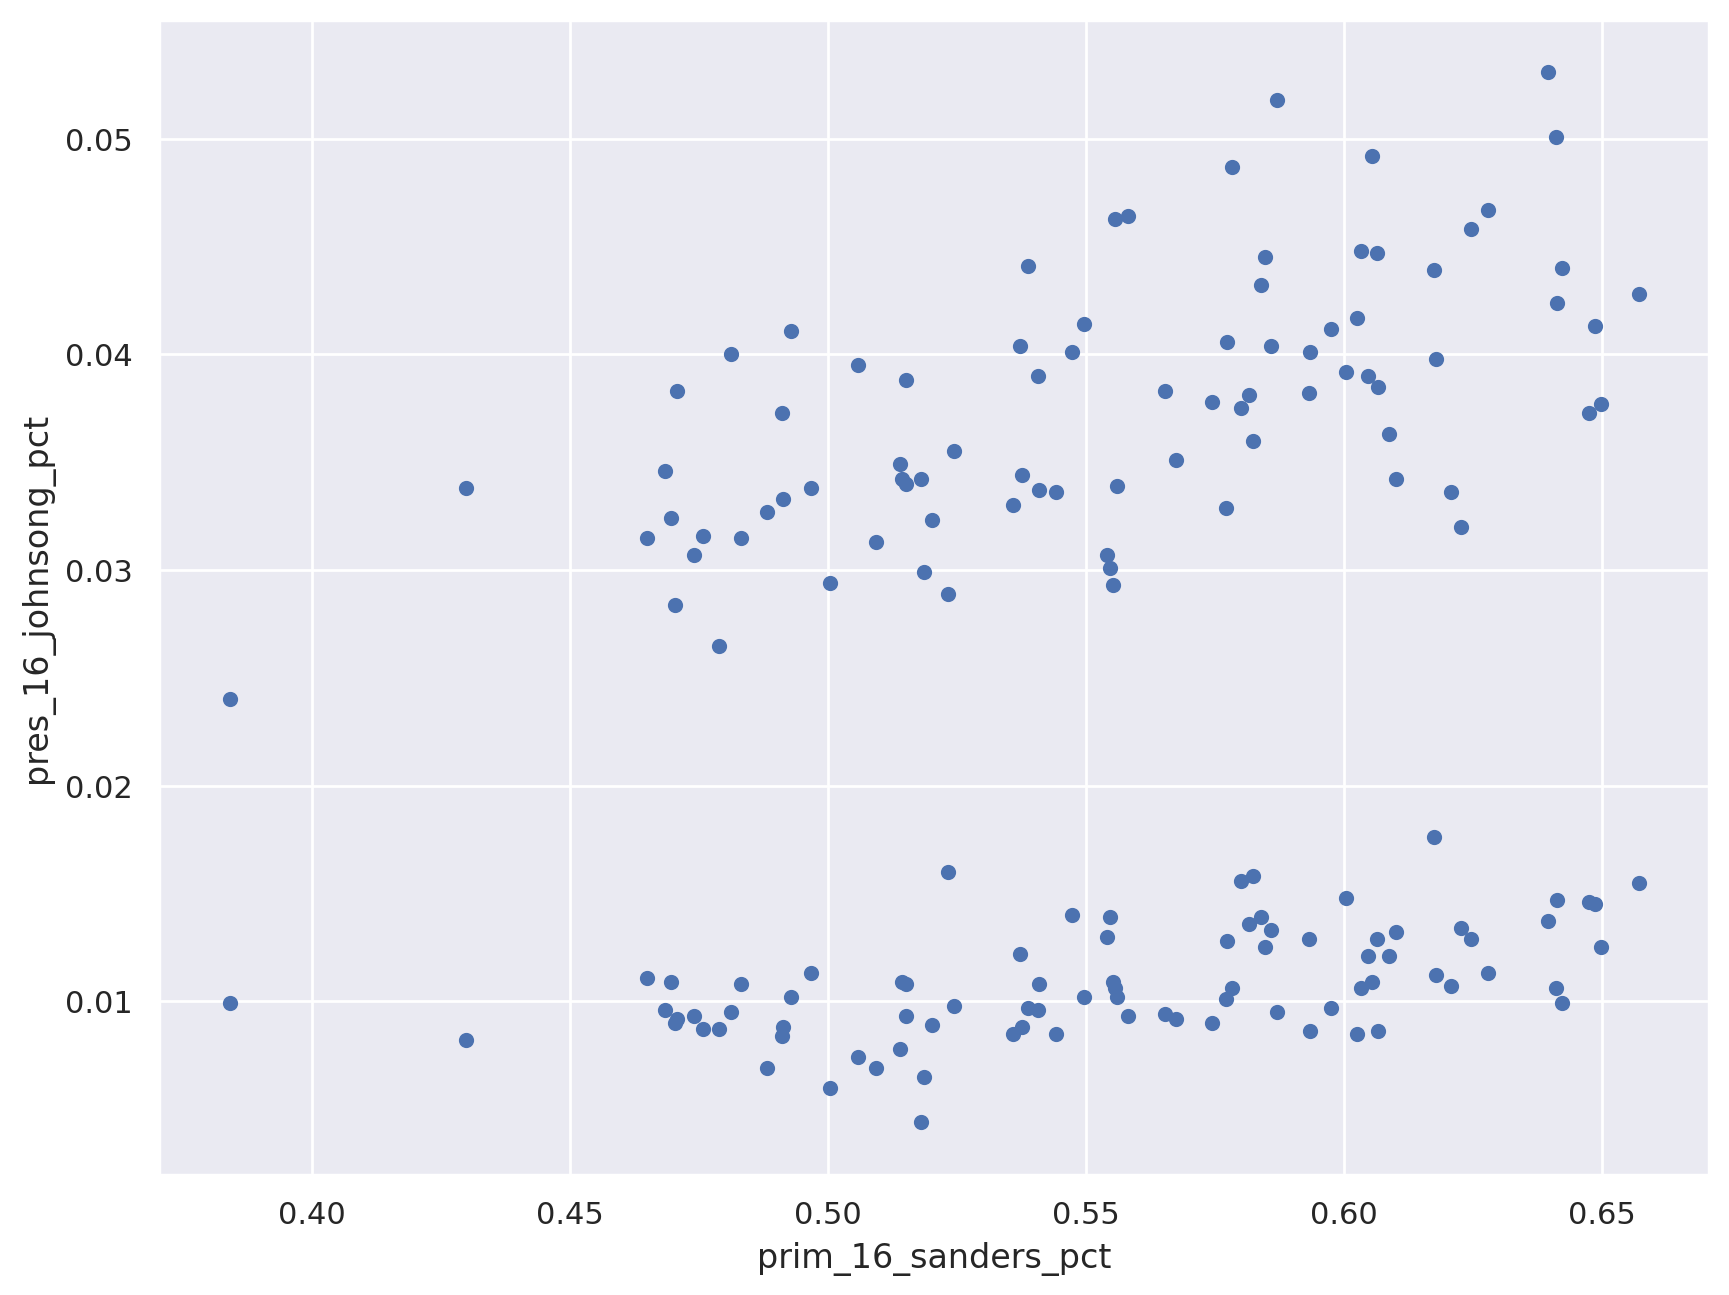

In [11]:
ax = df.plot(
    x="prim_16_sanders_pct",
    y="pres_16_steinj_pct",
    kind="scatter",
)
df.plot(x="prim_16_sanders_pct", y="pres_16_johnsong_pct", kind="scatter", ax=ax)

In [12]:
df["prim_16_sanders_pct"].corr(df["pres_16_johnsong_pct"])

0.6105391322672098

In [13]:
np.corrcoef(df["prim_16_sanders_pct"], df["pres_16_johnsong_pct"])

array([[1.        , 0.61053913],
       [0.61053913, 1.        ]])

In [24]:
data = list()
for col in df.columns:
    if "pct" not in col:
        continue

    for col2 in df.columns:
        if col == col2:
            continue
        if "pct" not in col2:
            continue
        if not col2.startswith("prop"):
            continue
        row = dict()
        row[""] = col
        row["col_b"] = col2
        row["corr"] = df[col].corr(df[col2])
        data.append(row)
df_corr = pd.DataFrame(data)

In [26]:
data

[]

In [22]:
df_corr.sort_values(by="corr", ascending=False)

KeyError: 'corr'

Text(0.5, 0, 'Kasich % (2016 Primary)')

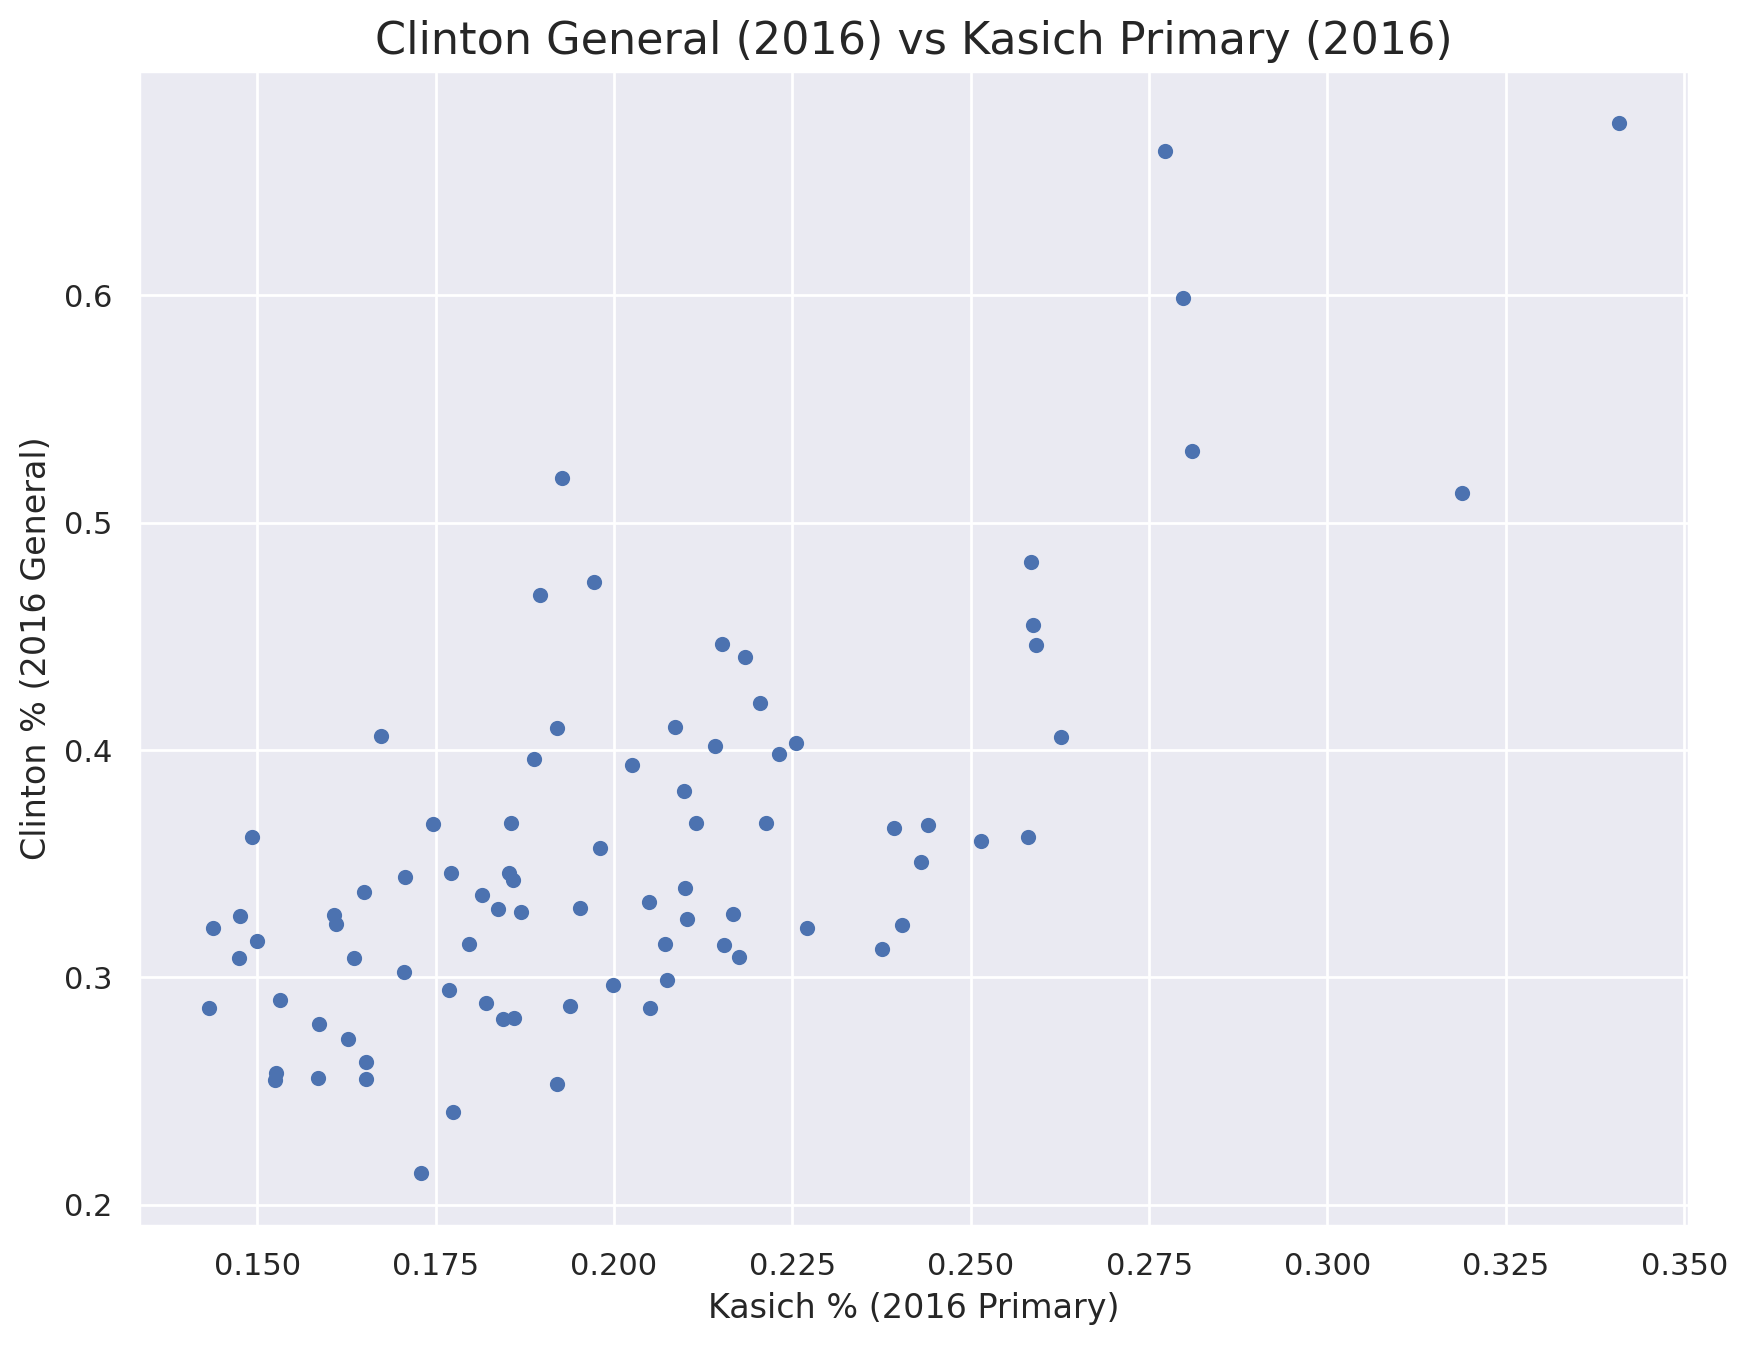

In [18]:
df.plot(x="prim_16_kasich_pct", y="pres_16_clintonh_pct", kind="scatter")
plt.title("Clinton General (2016) vs Kasich Primary (2016)")
plt.ylabel("Clinton % (2016 General)")
plt.xlabel("Kasich % (2016 Primary)")

<AxesSubplot: xlabel='pres_16_johnsong_pct', ylabel='prim_16_sanders_pct'>

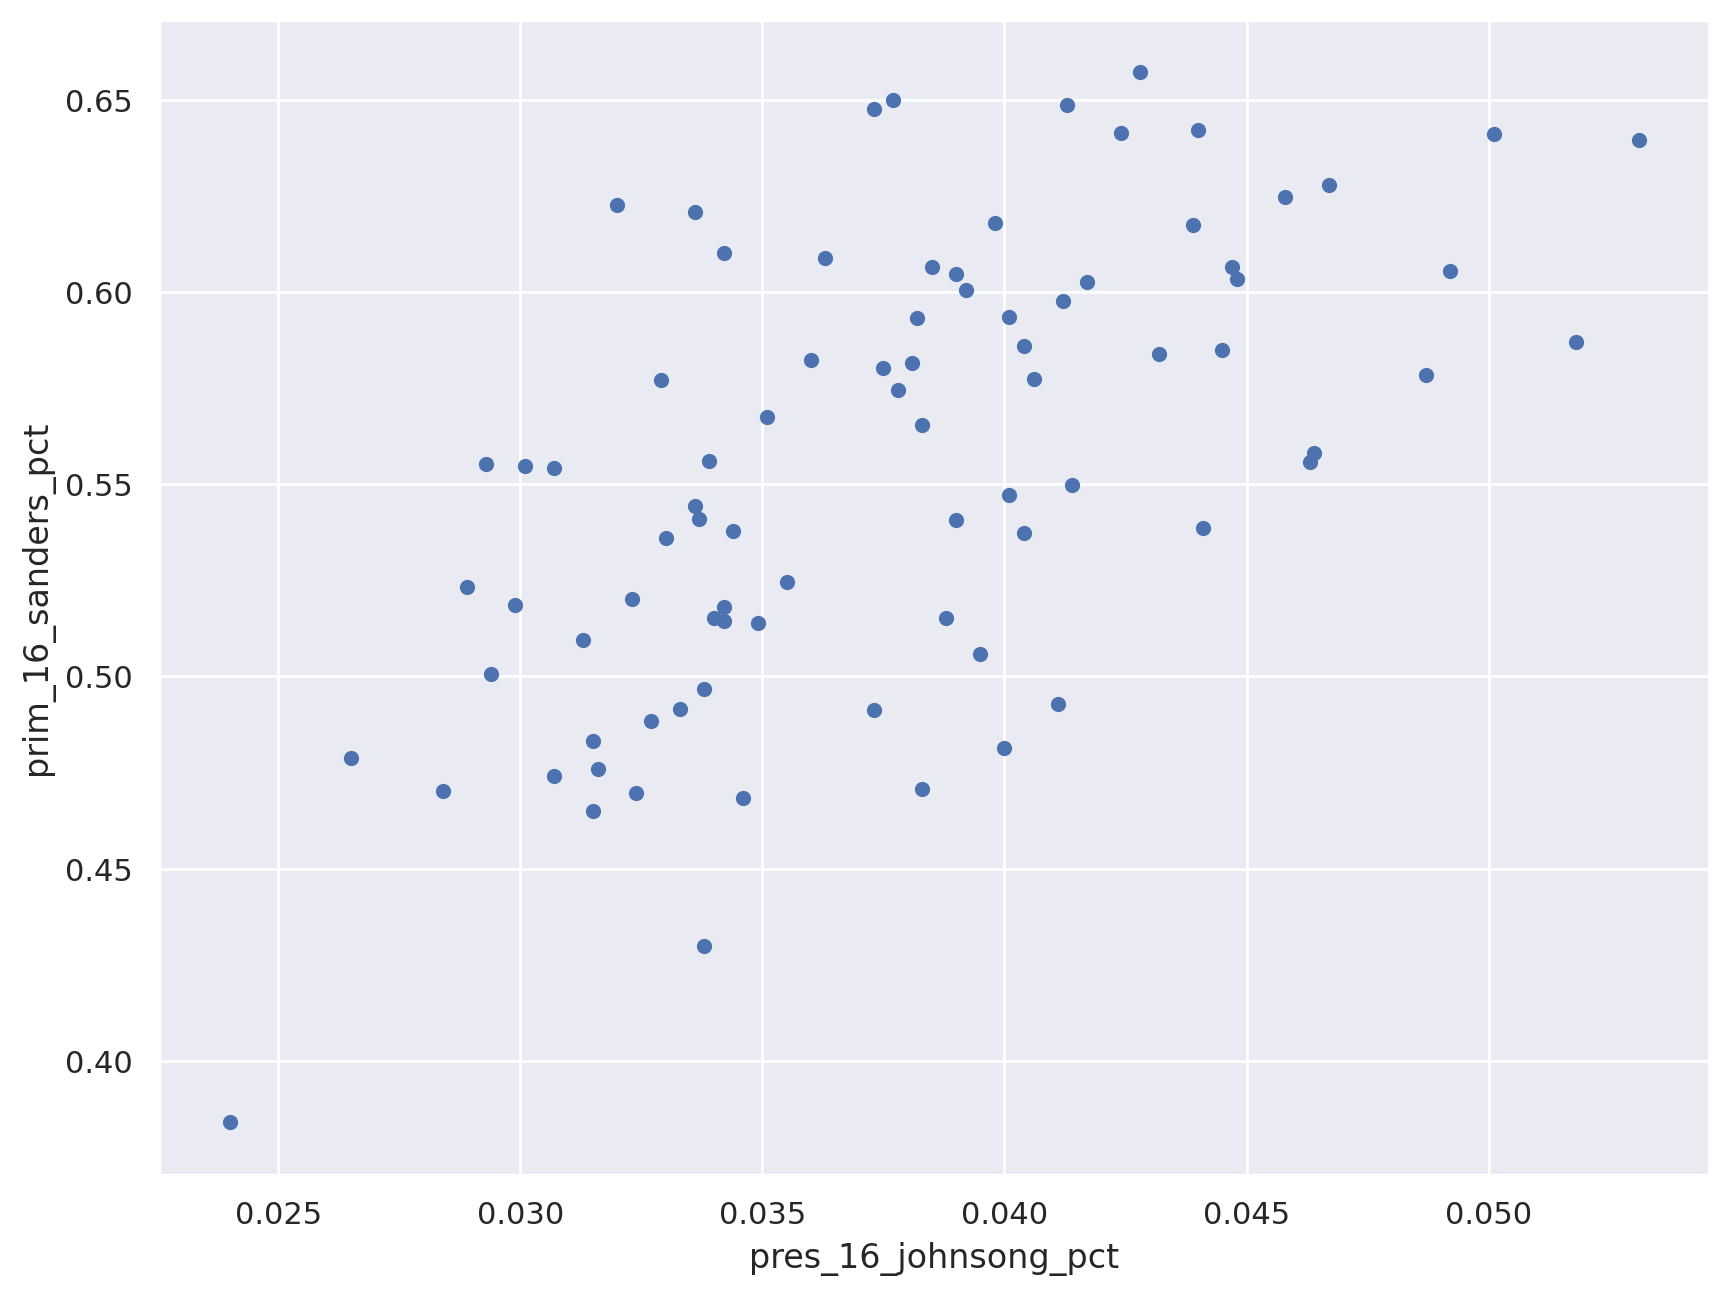

In [19]:
df.plot(x="pres_16_johnsong_pct", y="prim_16_sanders_pct", kind="scatter")